In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/cars.csv')

In [ ]:
df.head(10)

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000
5,Hyundai,45000,Petrol,First Owner,440000
6,Maruti,175000,LPG,First Owner,96000
7,Maruti,5000,Petrol,Second Owner,45000
8,Toyota,90000,Diesel,First Owner,350000
9,Ford,169000,Diesel,First Owner,200000


In [ ]:
df.isnull().sum()

brand            0
km_driven        0
fuel             0
owner            0
selling_price    0
dtype: int64

In [ ]:
df[['brand', 'fuel', 'owner']]

,brand,fuel,owner
0,Maruti,Diesel,First Owner
1,Skoda,Diesel,Second Owner
2,Honda,Petrol,Third Owner
3,Hyundai,Diesel,First Owner
4,Maruti,Petrol,First Owner
...,...,...,...
8123,Hyundai,Petrol,First Owner
8124,Hyundai,Diesel,Fourth & Above Owner
8125,Maruti,Diesel,First Owner
8126,Tata,Diesel,First Owner


In [ ]:
df['brand'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [ ]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [ ]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [ ]:
#Encoding###############################################################################

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],['Diesel', 'Petrol', 'LPG', 'CNG'],['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car']])
df[['brand', 'fuel', 'owner']]= oe.fit_transform(df[['brand', 'fuel', 'owner']])

In [ ]:
oe.categories_

[array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
        'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
        'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
        'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
        'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
       dtype=object),
 array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object),
 array(['First Owner', 'Second Owner', 'Third Owner',
        'Fourth & Above Owner', 'Test Drive Car'], dtype=object)]

In [ ]:
df[['brand', 'fuel', 'owner']]

,brand,fuel,owner
0,0.0,0.0,0.0
1,1.0,0.0,1.0
2,2.0,1.0,2.0
3,3.0,0.0,0.0
4,0.0,1.0,0.0
...,...,...,...
8123,3.0,1.0,0.0
8124,3.0,0.0,3.0
8125,0.0,0.0,0.0
8126,8.0,0.0,0.0


In [ ]:
df

,brand,km_driven,fuel,owner,selling_price
0,0.0,145500,0.0,0.0,450000
1,1.0,120000,0.0,1.0,370000
2,2.0,140000,1.0,2.0,158000
3,3.0,127000,0.0,0.0,225000
4,0.0,120000,1.0,0.0,130000
...,...,...,...,...,...
8123,3.0,110000,1.0,0.0,320000
8124,3.0,119000,0.0,3.0,135000
8125,0.0,120000,0.0,0.0,382000
8126,8.0,25000,0.0,0.0,290000


In [ ]:
X= df.drop('selling_price', axis=1)
y= df['selling_price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)
X_train.shape, X_test.shape

((5689, 4), (2439, 4))

In [ ]:
#StandardScaler###########################################################

In [ ]:
#x' = (x- mean)/std

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# transform train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
scaler.mean_

array([4.73967305e+00, 6.99157710e+04, 4.76885217e-01, 4.59834769e-01])

In [ ]:
X_train

,brand,km_driven,fuel,owner
2246,9.0,50000,1.0,0.0
2095,9.0,120000,0.0,1.0
3290,3.0,60000,1.0,0.0
6868,0.0,5000,1.0,0.0
6895,7.0,40000,0.0,0.0
...,...,...,...,...
7935,0.0,100000,1.0,2.0
5192,3.0,152000,0.0,0.0
3980,3.0,70000,1.0,0.0
235,0.0,110000,0.0,1.0


In [ ]:
X_train_scaled

array([[ 0.82289928, -0.3808476 ,  0.95159126, -0.63587392],
       [ 0.82289928,  0.95775648, -0.86749566,  0.7469574 ],
       [-0.33602485, -0.18961845,  0.95159126, -0.63587392],
       ...,
       [-0.33602485,  0.0016107 ,  0.95159126, -0.63587392],
       [-0.91548691,  0.76652732, -0.86749566,  0.7469574 ],
       [-0.91548691, -0.07956607,  0.95159126, -0.63587392]])

In [ ]:
np.round(X_train_scaled, 1)

array([[ 0.8, -0.4,  1. , -0.6],
       [ 0.8,  1. , -0.9,  0.7],
       [-0.3, -0.2,  1. , -0.6],
       ...,
       [-0.3,  0. ,  1. , -0.6],
       [-0.9,  0.8, -0.9,  0.7],
       [-0.9, -0.1,  1. , -0.6]])

In [ ]:
X_train_scaled.dtype

dtype('float64')

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
import matplotlib.pyplot as plt


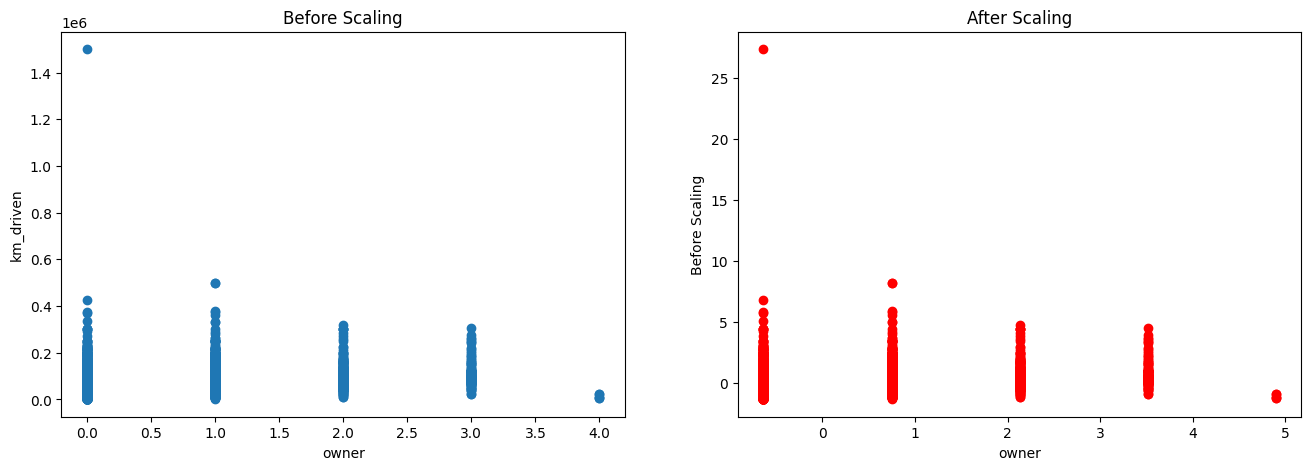

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.scatter(X_train['owner'], X_train['km_driven'])
plt.xlabel('owner')
plt.ylabel('km_driven')
plt.title('Before Scaling')

plt.subplot(1,2,2)
plt.scatter(X_train_scaled['owner'], X_train_scaled['km_driven'],color='red')
plt.xlabel('owner')
plt.ylabel('Before Scaling')
plt.title('After Scaling')


plt.show()

In [ ]:
import seaborn as sns

<ipython-input-36-4629917c6c17>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['owner'])
<ipython-input-36-4629917c6c17>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_scaled['owner'])


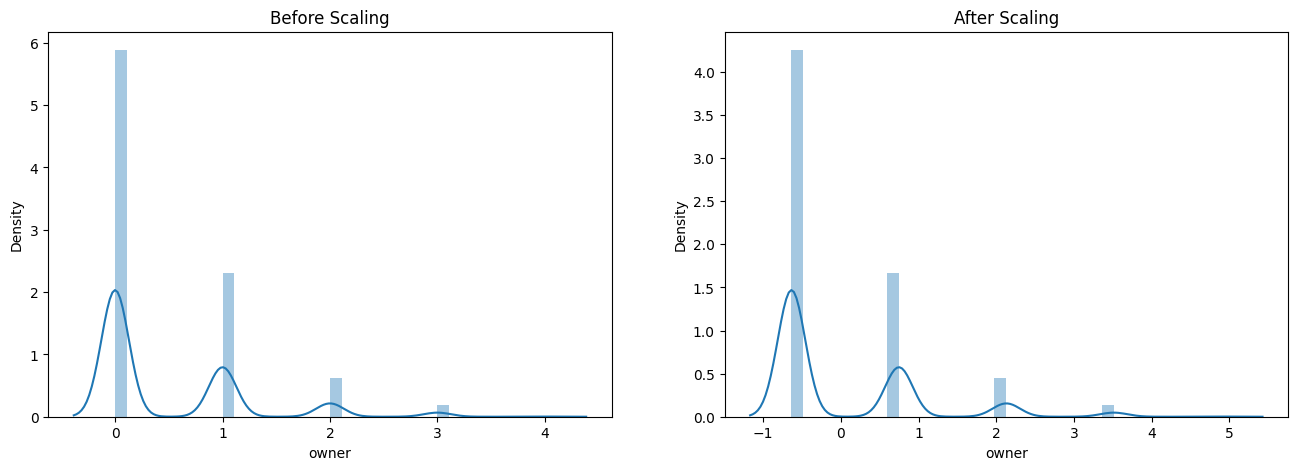

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(X_train['owner'])
plt.title('Before Scaling')

plt.subplot(1,2,2)
sns.distplot(X_train_scaled['owner'])
plt.title('After Scaling')

plt.show()

In [ ]:
#PDF and QQplot####################################################################(log transform)

In [ ]:
import statistics as stats
import matplotlib.pyplot as plt

# Now you can use functions from the 'stats' module, such as stats.mean() or stats.median()


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [ ]:
import seaborn as sns

In [ ]:
from scipy import stats

<ipython-input-76-62c8f820ff11>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['owner'])


ValueError: ignored

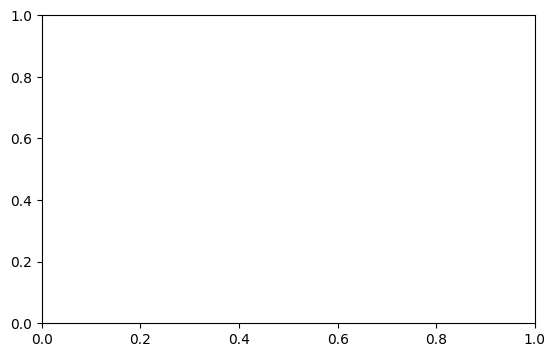

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.distplot(X_train['owner'])
plt.title('owner PDF')

plt.subplot(1,2,2)
stats.probplot(X_train['owner'], dist="norm", plot=plt)
plt.title('owner QQ Plot')

plt.show()

In [ ]:
#log transformation############################

In [ ]:
from sklearn.preprocessing import FunctionTransformer
trf = FunctionTransformer(func=np.log1p)
X_train_transformed= trf.fit_transform(X_train)
X_test_transformed= trf.transform(X_test)

In [ ]:
#model and log transformation################################################

In [ ]:
#with log transformation
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_transformed,y_train)
y_pred= clf.predict(X_test_transformed)

print("accuracy : ", accuracy_score(y_test, y_pred))

accuracy :  0.056990569905699055


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#outlier##########################################

In [ ]:
df['selling_price'].skew() #Left Skewed

4.193533440675855

In [ ]:
df['selling_price'].describe()

count    8.128000e+03
mean     6.382718e+05
std      8.062534e+05
min      2.999900e+04
25%      2.549990e+05
50%      4.500000e+05
75%      6.750000e+05
max      1.000000e+07
Name: selling_price, dtype: float64

<Axes: >

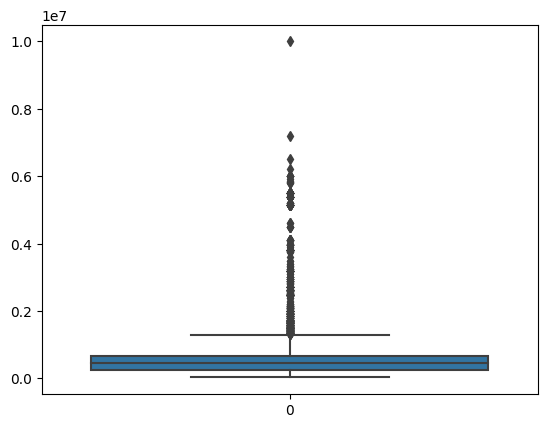

In [ ]:
sns.boxplot(df['selling_price'])

In [ ]:
# Finding the IQR
percentile25 = df['selling_price'].quantile(0.25)
percentile75 = df['selling_price'].quantile(0.75)

In [ ]:
iqr=percentile75-percentile25
iqr

420001.0

In [ ]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [ ]:
outlier= df[(df['selling_price']>upper_limit) |
         (df['selling_price']<lower_limit)]
outlier.shape

(600, 5)

In [ ]:
#Box-plot fransformation##########################################################

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [ ]:
df = pd.read_csv('/content/cars.csv')
df

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000
...,...,...,...,...,...
8123,Hyundai,110000,Petrol,First Owner,320000
8124,Hyundai,119000,Diesel,Fourth & Above Owner,135000
8125,Maruti,120000,Diesel,First Owner,382000
8126,Tata,25000,Diesel,First Owner,290000


In [ ]:
df.isnull().sum()

brand            0
km_driven        0
fuel             0
owner            0
selling_price    0
dtype: int64

In [ ]:
X = df.drop(columns=['km_driven'])
y = df.iloc[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from scipy import stats

In [ ]:
# Applying Regression without any transformation
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

r2_score(y_test,y_pred)

ValueError: ignored

<ipython-input-68-f1bb624c0378>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


ValueError: ignored

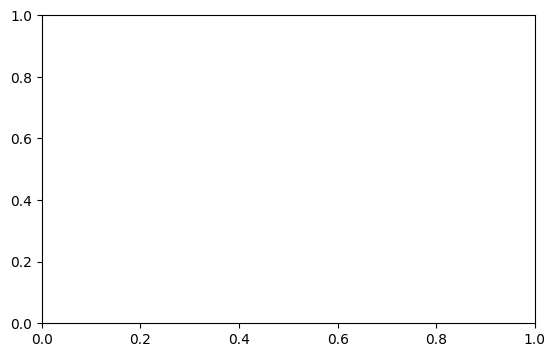

In [ ]:
# Plotting the distplots without any transformation

for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()